In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib
import itertools
import seaborn as sns



#############

# style of the graph



plt.style.use('bmh')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'
plt.style.context('bmh')
plt.rcParams["font.family"] = "Times New Roman"
############




data0 = pd.read_csv("/home/adzavon/Documents/MSC_Data_Analysis/merge for forecasting/causality_and_var.csv",
                   index_col='Date', parse_dates=True)
data0.head()

# distribution of the data

data_Idp = data0[["Idp"]] 

#data_Idp_not = sns.displot(data_Idp)# not normally distributed

data_Idp.head()

,Idp
Date,
2018-07-01,27347
2018-08-01,27571
2018-09-01,38982
2018-10-01,39731
2018-11-01,37367


In [2]:
# check the stationarity

from statsmodels.tsa.stattools import adfuller

print("Observations of Dickey-fuller test")
dftest = adfuller(data_Idp, autolag="AIC")
dfoutput = pd.Series(dftest[0:4],index = ["Test Statistic","P-value","#lags used","Number of Observation used"])
for key, value in dftest[4].items():
    dfoutput["Critical value (%s) "%key] = value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                -0.316523
P-value                        0.923131
#lags used                     0.000000
Number of Observation used    53.000000
Critical value (1%)           -3.560242
Critical value (5%)           -2.917850
Critical value (10%)          -2.596796
dtype: float64


In [3]:
# differencing the data

diff_data0 = data_Idp.diff()
diff_new = diff_data0.dropna()

print("Observations of Dickey-fuller test")
dftest1 = adfuller(diff_new["Idp"], autolag="AIC")
dfoutput = pd.Series(dftest1[0:4],index = ["Test Statistic","P-value","#lags used","Number of Observation used"])
for key, value in dftest1[4].items():
    dfoutput["Critical value (%s) "%key] = value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic               -6.748638e+00
P-value                       2.990120e-09
#lags used                    0.000000e+00
Number of Observation used    5.200000e+01
Critical value (1%)          -3.562879e+00
Critical value (5%)          -2.918973e+00
Critical value (10%)         -2.597393e+00
dtype: float64


In [4]:
diff_data1 = diff_data0.diff()
diff_new1 = diff_data1.dropna()

print("Observations of Dickey-fuller test")
dftest2 = adfuller(diff_new1["Idp"], autolag="AIC")
dfoutput = pd.Series(dftest2[0:4],index = ["Test Statistic","P-value","#lags used","Number of Observation used"])
for key, value in dftest2[4].items():
    dfoutput["Critical value (%s) "%key] = value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic               -6.115748e+00
P-value                       9.103782e-08
#lags used                    3.000000e+00
Number of Observation used    4.800000e+01
Critical value (1%)          -3.574589e+00
Critical value (5%)          -2.923954e+00
Critical value (10%)         -2.600039e+00
dtype: float64


/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


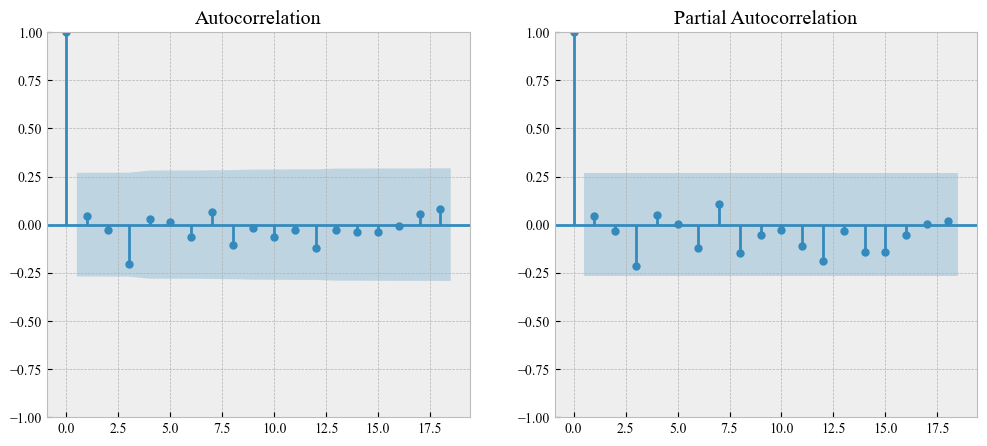

In [5]:
fig, ax = plt.subplots(1, 2, figsize =(12,5))
sm.graphics.tsa.plot_acf(diff_new.values.squeeze(), ax = ax[0])
sm.graphics.tsa.plot_pacf(diff_new.values.squeeze(),ax = ax[1])
plt.show()


In [6]:
#########################################

#              ARIMA 

#########################################



# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error



#Split data into training and testing sets
train = data0[:'2022-05-01']
test = data0['2022-06-01':]

# Fit ARIMA model to training data
model = ARIMA(train['Idp'], order=(5, 2, 2))
model_fit = model.fit()

# Generate forecasts for the next six months
forecast = model_fit.get_forecast(steps=32)

# Extract the forecasted values and confidence intervals
pred_values = forecast.predicted_mean
pred_ci = forecast.conf_int()

# Print the forecasts
print(pred_values)

mae = mean_absolute_error(test['Idp'], pred_values[:len(test['Idp'])])
#mse = mean_squared_error(test['Idp'], pred_values[:len(test['Idp'])])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Idp'] - pred_values[:len(test['Idp'])]) / test['Idp'])) * 100
accuracy = 100- mape
print('MAE:', mae)
#print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)
print("Accuracy", accuracy)

# Plot the forecasts and actual values
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(train['Idp'], label='Training')
plt.plot(test['Idp'], label='Testing')
plt.plot(pred_values, label='Forecast',color='black')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], 
                 color="purple", alpha=0.5,
                 label="forecast confidence interval")
plt.legend(loc="upper left")
plt.grid(alpha=0.8)
plt.title("Internal Migration Forecast for 2025\n")
plt.show()


/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:

2022-06-01    1.591826e+06
2022-07-01    1.805630e+06
2022-08-01    1.755336e+06
2022-09-01    1.725037e+06
2022-10-01    1.707179e+06
2022-11-01    1.782967e+06
2022-12-01    1.888758e+06
2023-01-01    1.877476e+06
2023-02-01    1.909844e+06
2023-03-01    1.879408e+06
2023-04-01    1.982467e+06
2023-05-01    1.994299e+06
2023-06-01    2.062125e+06
2023-07-01    2.043667e+06
2023-08-01    2.092228e+06
2023-09-01    2.121348e+06
2023-10-01    2.170387e+06
2023-11-01    2.203930e+06
2023-12-01    2.218632e+06
2024-01-01    2.262392e+06
2024-02-01    2.282220e+06
2024-03-01    2.339481e+06
2024-04-01    2.351861e+06
2024-05-01    2.399037e+06
2024-06-01    2.414206e+06
2024-07-01    2.462199e+06
2024-08-01    2.487852e+06
2024-09-01    2.526037e+06
2024-10-01    2.554890e+06
2024-11-01    2.585870e+06
2024-12-01    2.623545e+06
2025-01-01    2.651455e+06
Freq: MS, Name: predicted_mean, dtype: float64


NameError: name 'mse' is not defined

In [7]:
######################################

#              SARIMA

#####################################



# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Split data into training and testing sets
train = data0[:'2022-05-01']
test = data0['2022-06-01':]

# Fit SARIMA model to training data
model = SARIMAX(train['Idp'], order=(5, 2, 2), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit()

# Generate forecasts for the next 24 months
forecasts = model_fit.forecast(steps=32)
pred_int = forecast.conf_int()

# Calculate evaluation metrics
mae = mean_absolute_error(test['Idp'], forecasts[:len(test['Idp'])])
mse = mean_squared_error(test['Idp'], forecasts[:len(test['Idp'])])
mape = np.mean(np.abs((test['Idp'] - forecasts[:len(test['Idp'])]) / test['Idp'])) * 100

accuracy = 100- mape
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape)
print("Accuracy", accuracy)

# Plot the forecasts and actual values
fig, ax = plt.subplots(figsize=(8,4))
plt.fill_between(pred_int.index, pred_int.iloc[:, 0], pred_int.iloc[:, 1], 
                 color="grey", alpha=0.5,
                 label="SARIMAX 95% forecast interval")
plt.plot(train['Idp'], label='Training')
plt.plot(test['Idp'], label='Testing')
plt.plot(forecasts, label='Forecast', color="black")
plt.legend(loc = "upper left")
plt.title("Internal Migration Forecast for 2025\n")
plt.show()

print(forecasts)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24593D+01    |proj g|=  8.40091D-01

At iterate    5    f=  1.19938D+01    |proj g|=  2.89080D-02

At iterate   10    f=  1.19762D+01    |proj g|=  2.24736D-02

At iterate   15    f=  1.19719D+01    |proj g|=  2.80699D-03

At iterate   20    f=  1.19715D+01    |proj g|=  2.84139D-03

At iterate   25    f=  1.19715D+01    |proj g|=  1.59465D-04

At iterate   30    f=  1.19715D+01    |proj g|=  1.13301D-03

At iterate   35    f=  1.19715D+01    |proj g|=  3.19456D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/adzavon/anaconda3/lib/python3.10/site-packages/statsmodel

NameError: name 'rmse' is not defined